In [1]:
import numpy as np
from scipy.spatial.transform import Rotation as R

def compute_centroid(point_cloud):
    return np.mean(point_cloud, axis=0)

def compute_rotation_and_translation(pc1, pc2):
    # Compute centroids
    centroid_pc1 = compute_centroid(pc1)
    centroid_pc2 = compute_centroid(pc2)
    
    # Center the point clouds
    pc1_centered = pc1 - centroid_pc1
    pc2_centered = pc2 - centroid_pc2
    
    # Compute the covariance matrix
    H = np.dot(pc1_centered.T, pc2_centered)
    
    # Compute the Singular Value Decomposition (SVD)
    U, S, Vt = np.linalg.svd(H)
    
    # Compute the rotation matrix
    R = np.dot(Vt.T, U.T)
    
    # Compute the translation vector
    t = -np.dot(R, centroid_pc1.T) + centroid_pc2.T
    
    return R, t

def apply_transformation(pc, R, t):
    # Apply rotation
    pc_rotated = np.dot(R, pc.T).T
    
    # Apply translation
    pc_transformed = pc_rotated + t
    
    return pc_transformed

# Let's test it with two point clouds
pc1 = np.random.rand(10, 3)  # Create a point cloud with 10 points
pc2 = pc1 + 2  # Create a second point cloud that is just the first one translated by 2 in all axes

# Compute the transformation
R, t = compute_rotation_and_translation(pc1, pc2)

# Apply the transformation
pc1_transformed = apply_transformation(pc1, R, t)

# Check if the transformed point cloud matches the second one
print(np.allclose(pc1_transformed, pc2))


True


In [2]:
# Compute inverse rotation and translation
R_inv = R.T  # Inverse of a rotation matrix is its transpose
t_inv = -np.dot(R_inv, t)  # Inverse translation

# Apply the inverse transformation to pc2
pc2_transformed_back = apply_transformation(pc2, R_inv, t_inv)

# Check if the transformed back point cloud matches the first one
print(np.allclose(pc2_transformed_back, pc1))


True


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def csv_to_numpy(csv_file):
    df = pd.read_csv(csv_file, skiprows=5, header=None, usecols=range(2, 326))
    data = df.to_numpy()
    data = data.reshape(-1, 108, 3)
    print(data.shape)
    return data

In [5]:
#filename = 'FRS_M5.csv'
spc = csv_to_numpy('20230412_CH_MTest.csv')

(561, 108, 3)


In [6]:
def dental_support_transform(rf_array, pc_array):
    A, B, C = rf_array
    P = np.concatenate(pc_array, axis=0).reshape(-1, 3)

    # Compute the centroid of A, B and C
    G = (A + B + C) / 3.0

    # Compute the vectors AB, AC
    AB = B - A
    AC = C - A

    # Define the new axes
    x_axis = AB / np.linalg.norm(AB)
    y_axis = np.cross(AB, AC)
    y_axis = y_axis / np.linalg.norm(y_axis)
    z_axis = np.cross(x_axis, y_axis)

    # Construct the rotation matrix using the new axes
    R = np.vstack([x_axis, y_axis, z_axis])

    # Express P in the new coordinate system
    P_new = np.dot(P - G, R)

    return P_new

In [7]:
# Iterate through all the rows of the dataframe
spct0_list = []
for pc in spc:
    rf_array = [pc[0], pc[1], pc[2]]
    pt = dental_support_transform(rf_array, pc)
    spct0_list.append(pt)
spct0 = np.array(spct0_list)

In [8]:
spct0.shape

(561, 108, 3)

MovieWriter ffmpeg unavailable; using Pillow instead.


Note: you may need to restart the kernel to use updated packages.


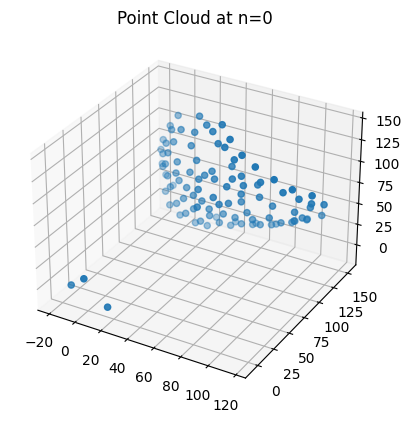

In [10]:
%pip install JSAnimation

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Create a random 3D numpy array for demonstration
# array shape: (n=561, number_of_points=105, number_of_dimensions=3)
arr = spct0

# Create a figure and 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot for the first point cloud
scatter = ax.scatter(arr[0,:,0], arr[0,:,1], arr[0,:,2])

# Function to update the scatter plot for each frame
def update(frame):
    scatter._offsets3d = (arr[frame,:,0], arr[frame,:,1], arr[frame,:,2])
    ax.set_title(f'Point Cloud at n={frame}')

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=range(561), interval=50)

# Convert the animation to HTML
#html = ani.to_jshtml()

ani.save('spc-1.gif')

# Display the animation
#HTML(html)

In [14]:
pc1 = spct0[0, :3, :]
pc2 = spct0[0, :3, :]
R, t = compute_rotation_and_translation(pc1, pc2)

In [27]:
spct1_list = []
pc0 = spct0[0, :3, :]
vp0 = np.array([1, 1, 1])
pc0 = np.vstack([pc0, vp0])
for pc in spct0:
    pci = pc[:3, :]
    vpi = np.array([1, 1, 1])
    pci = np.vstack([pci, vpi])
    R, t = compute_rotation_and_translation(pci, pc0)
    pt = apply_transformation(pc, R, t)
    spct1_list.append(pt)
spct1 = np.array(spct1_list)

MovieWriter ffmpeg unavailable; using Pillow instead.


Note: you may need to restart the kernel to use updated packages.


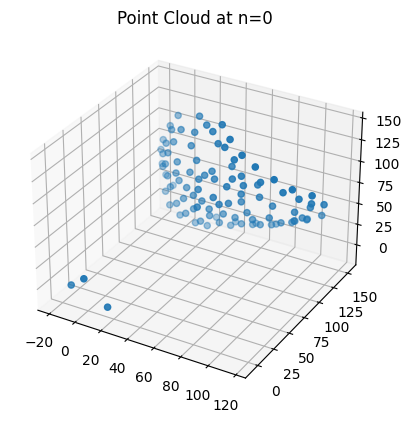

In [28]:
%pip install JSAnimation

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Create a random 3D numpy array for demonstration
# array shape: (n=561, number_of_points=105, number_of_dimensions=3)
arr = spct1

# Create a figure and 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot for the first point cloud
scatter = ax.scatter(arr[0,:,0], arr[0,:,1], arr[0,:,2])

# Function to update the scatter plot for each frame
def update(frame):
    scatter._offsets3d = (arr[frame,:,0], arr[frame,:,1], arr[frame,:,2])
    ax.set_title(f'Point Cloud at n={frame}')

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=range(561), interval=50)

# Convert the animation to HTML
#html = ani.to_jshtml()

ani.save('spc-5.gif')

# Display the animation
#HTML(html)

In [ ]:
# Compute the transformation
R, t = compute_rotation_and_translation(pc1, pc2)

# Iterate through all the rows of the dataframe
PC_list = []
rf0 = [df["M1"][0], df["M2"][0], df["M3"][0]]
for i in range(len(df)):
    rfi = [df["M1"][i], df["M2"][i], df["M3"][i]]
    R, t = compute_rotation_and_translation(rf0, rfi)
    P_new = dental_support_transform(rfi, df.values[i][:])
    PC_list.append(P_new)
PC = np.array(PC_list)

In [12]:
df.values[0]

array([array([  -1.508011,  -40.246582, 1069.507324]),
       array([  28.369339,  -38.369717, 1049.250977]),
       array([  -1.153032,  -33.38969 , 1035.797974]),
       array([ -26.615147,  100.029701, 1173.362671]),
       array([ -14.600445,   90.388336, 1175.256348]),
       array([2.88996000e-01, 8.44915770e+01, 1.17400977e+03]),
       array([  13.592772,   83.375427, 1172.195801]),
       array([  30.050934,   83.455818, 1171.946899]),
       array([  44.88916 ,   86.063927, 1170.90979 ]),
       array([  58.372383,   92.848961, 1170.029907]),
       array([ -40.516434,  116.358101, 1142.014526]),
       array([ -32.430115,  106.091995, 1151.457275]),
       array([ -26.369375,   97.849396, 1160.126831]),
       array([ -11.723736,   88.796951, 1163.415283]),
       array([3.08604000e-01, 8.55538790e+01, 1.16042786e+03]),
       array([  14.483124,   84.939133, 1146.809814]),
       array([  26.763693,   85.389679, 1154.476318]),
       array([  43.373539,   86.779404, 1158.49

In [13]:
pc = df.values.tolist()

In [14]:
pc1 = np.random.rand(10, 3)
pc1.shape

(10, 3)

In [16]:
pc = [lambda x: np.array(x) for x in pc]

AttributeError: 'list' object has no attribute 'applymap'